<a href="https://colab.research.google.com/github/harishmuh/demo_teaching_data_science/blob/main/Diabetes_Risk_Prediction_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Classification**

We will use diabetes dataset

In [27]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

In [4]:
# loading data files
df = pd.read_csv('/content/diabetes_data.csv')

df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
# data dimension
df.shape

(520, 17)

In [7]:
# Columns
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [9]:
# Data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [10]:
# Desriptive statistic
display(df.describe(), df.describe(include='object').T)

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


,count,unique,top,freq
Gender,520,2,Male,328
Polyuria,520,2,No,262
Polydipsia,520,2,No,287
sudden weight loss,520,2,No,303
weakness,520,2,Yes,305
Polyphagia,520,2,No,283
Genital thrush,520,2,No,404
visual blurring,520,2,No,287
Itching,520,2,No,267
Irritability,520,2,No,394


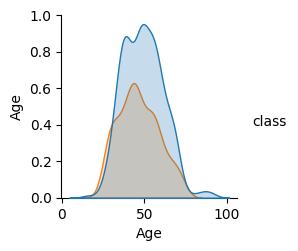

In [12]:
# Visualization
sns.pairplot(df, hue='class')
plt.show()

In [61]:
# Define categorical and numerical columns
numerical_cols = df.select_dtypes(include='number').columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print('numerical columns: ', numerical_cols)
print('categorical columns: ', categorical_cols)


numerical columns:  ['Age']
categorical columns:  ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']


In [63]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [64]:
# Unique values in each categorical columns
for col in categorical_cols:
  print(f'{col}: {df[col].unique()}')

Gender: ['Male' 'Female']
Polyuria: ['No' 'Yes']
Polydipsia: ['Yes' 'No']
sudden weight loss: ['No' 'Yes']
weakness: ['Yes' 'No']
Polyphagia: ['No' 'Yes']
Genital thrush: ['No' 'Yes']
visual blurring: ['No' 'Yes']
Itching: ['Yes' 'No']
Irritability: ['No' 'Yes']
delayed healing: ['Yes' 'No']
partial paresis: ['No' 'Yes']
muscle stiffness: ['Yes' 'No']
Alopecia: ['Yes' 'No']
Obesity: ['Yes' 'No']
class: ['Positive' 'Negative']


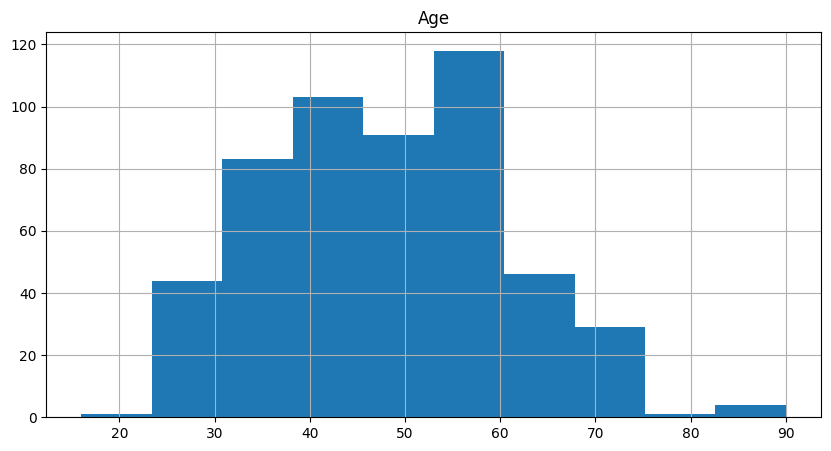

In [14]:
# Visualization
df.hist(bins=10, figsize=(10,5))
plt.show()

## Data preparation

In [29]:
# Missing values
df.isna().sum().to_frame('Missing Values')

,Missing Values
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [30]:
# Duplicates check
df.duplicated().sum()

269

In [31]:
# Handling duplicates
df.drop_duplicates(inplace=True)

In [32]:
# Sanity check
df.duplicated().sum()

0

## Machine learning

In [21]:
# Importing libraries for machine learning classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, classification_report



In [33]:
# Data copy
data = df.copy()

In [34]:
# Quick review
display(data.head(), data.tail())

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [35]:
# Target
df['class'].value_counts()

,count
class,
Positive,173
Negative,78


In [36]:
# Define target and feature
X = data.drop('class', axis=1)
y = data['class']

In [37]:
# Changing class format
y = y.replace({'Positive': 1, 'Negative': 0})
y.unique()

array([1, 0])

In [38]:
# Data preprocessing
# Column transformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity',]),
    remainder='passthrough'
)


In [39]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% data training

In [40]:
# Define Xgboost model
from xgboost import XGBClassifier

In [41]:
# Pipeline
from imblearn.pipeline import make_pipeline
classification_pipeline_xgb = make_pipeline(transformer, XGBClassifier())


In [42]:
# Training model
classification_pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Polyuria',
                                                   'Polydipsia',
                                                   'sudden weight loss',
                                                   'weakness', 'Polyphagia',
                                                   'Genital thrush',
                                                   'visual blurring', 'Itching',
                                                   'Irritability',
                                                   'delayed healing',
                                                   'partial paresis',
                                                   'muscle stiffness',
                                                   'Alopecia', 'Obesity'])]))...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [44]:
# XGB model performance
y_pred_xgb = classification_pipeline_xgb.predict(X_train)
print(classification_report(y_train, y_pred_xgb))
print(confusion_matrix(y_train, y_pred_xgb))
print(f'Recall score on data train: {recall_score(y_train, y_pred_xgb)}')
print('-----'*20)

y_pred_xgb = classification_pipeline_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(f'Recall score on data test: {recall_score(y_test, y_pred_xgb)}')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.99      1.00       124

    accuracy                           0.99       175
   macro avg       0.99      1.00      0.99       175
weighted avg       0.99      0.99      0.99       175

[[ 51   0]
 [  1 123]]
Recall score on data train: 0.9919354838709677
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.70      0.78        27
           1       0.85      0.94      0.89        49

    accuracy                           0.86        76
   macro avg       0.86      0.82      0.83        76
weighted avg       0.86      0.86      0.85        76

[[19  8]
 [ 3 46]]
Recall score on data test: 0.9387755102040817


In [45]:
# Define model random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [47]:
# Pipeline random forest
from imblearn.pipeline import make_pipeline
classification_pipeline_rfc = make_pipeline(transformer, rfc)


In [48]:
# Training model # Fitting to data train
classification_pipeline_rfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Polyuria',
                                                   'Polydipsia',
                                                   'sudden weight loss',
                                                   'weakness', 'Polyphagia',
                                                   'Genital thrush',
                                                   'visual blurring', 'Itching',
                                                   'Irritability',
                                                   'delayed healing',
                                                   'partial paresis',
                                                   'muscle stiffness',
                                                   'Alopecia', 'Obesity'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [49]:
# Random forest model performance
y_pred_rfc = classification_pipeline_rfc.predict(X_train)
print(classification_report(y_train, y_pred_rfc))
print(confusion_matrix(y_train, y_pred_rfc))
print(f'Recall score on data train: {recall_score(y_train, y_pred_rfc)}')
print('-----'*20)

y_pred_rfc = classification_pipeline_rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))
print(f'Recall score on data test: {recall_score(y_test, y_pred_rfc)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00       124

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175

[[ 51   0]
 [  0 124]]
Recall score on data train: 1.0
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.96      0.96      0.96        49

    accuracy                           0.95        76
   macro avg       0.94      0.94      0.94        76
weighted avg       0.95      0.95      0.95        76

[[25  2]
 [ 2 47]]
Recall score on data test: 0.9591836734693877


Random forest memiliki performa lebih baik dibandingkan dengan XGBOOST model karena memiliki recall score yang lebih besar pada data test dibandingkan dengan XGBoost model.